# Cyber Security Analytics

Conducting an investigation on a web server logs to identify malicious attack activity using Python data science libraries.

In [2]:
# Import libraries as required
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 10)

data_file = 'ao2-oladapo'


# Load in the data set as required - 
data_path = 'C:\Users\lordj\Desktop\Jupyter'
data = pd.read_csv(data_path + data_file, delim_whitespace=True)
#data.to_csv('out.csv')
temp_df = data[data.columns[:-1]]
temp_df.columns = data.columns[1:]
data = temp_df
data

date      time           s-ip cs-method        cs-uri-stem  \
0      2022-01-01  04:07:00  57.213.70.113       GET       template.css   
1      2022-01-01  04:07:00  57.213.70.113       GET       template.css   
2      2022-01-01  04:07:00  57.213.70.113       GET       hsvlyggz.css   
3      2022-01-01  04:07:00  57.213.70.113       GET         index.aspx   
4      2022-01-01  04:07:16  57.213.70.113       GET         favico.ico   
...           ...       ...            ...       ...                ...   
70705  2022-01-30  23:36:34  57.213.70.113       GET         footer.css   
70706  2022-01-30  23:36:34  57.213.70.113       GET        ljjsfyon.js   
70707  2022-01-30  23:36:34  57.213.70.113       GET  transactions.aspx   
70708  2022-01-30  23:36:46  57.213.70.113       GET       template.css   
70709  2022-01-30  23:36:46  57.213.70.113       GET  transactions.aspx   

      cs-uri-query  s-port cs-username            c-ip  \
0       v=uwixfkca     443           -  92.123.193.245   
1       v=igohhmua     443           -  92.123.193.245   
2                -     443           -  92.123.193.245   
3                -     443           -  92.123.193.245   
4                -     443           -  92.123.193.245   
...            ...     ...         ...             ...   
70705            -     443    ry814066  194.202.68.159   
70706     v=599940     443    ry814066  194.202.68.159   
70707       page=3     443    ry814066  194.202.68.159   
70708   v=tvjgabsg     443    ry814066  194.202.68.159   
70709       page=4     443    ry814066  194.202.68.159   

                                          cs(User-Agent)  \
0      Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...   
1      Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...   
2      Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...   
3      Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...   
4      Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...   
...                                                  ...   
70705  Mozilla/5.0+(iPhone;+CPU+iPhone+OS+12_4_1+like...   
70706  Mozilla/5.0+(iPhone;+CPU+iPhone+OS+12_4_1+like...   
70707  Mozilla/5.0+(iPhone;+CPU+iPhone+OS+12_4_1+like...   
70708  Mozilla/5.0+(iPhone;+CPU+iPhone+OS+12_4_1+like...   
70709  Mozilla/5.0+(iPhone;+CPU+iPhone+OS+12_4_1+like...   

                                      cs(Referer)  sc-status  sc-substatus  \
0                                               -        200             0   
1                                               -        200             0   
2                                               -        404             0   
3                                               -        200             0   
4             https://bankofpunk.local/index.aspx        200             0   
...                                           ...        ...           ...   
70705  https://bankofpunk.local/transactions.aspx        200             0   
70706  https://bankofpunk.local/transactions.aspx        200             0   
70707  https://bankofpunk.local/transactions.aspx        200             0   
70708  https://bankofpunk.local/transactions.aspx        200             0   
70709  https://bankofpunk.local/transactions.aspx        200             0   

       sc-win32-status  time-taken  
0                    0          24  
1                    0          21  
2                    0          26  
3                    0          26  
4                    0          24  
...                ...         ...  
70705                0          28  
70706                0          30  
70707                0          22  
70708                0          20  
70709                0          25  

[70710 rows x 15 columns]

In [2]:
# Get all column names
data.columns

Index(['date', 'time', 's-ip', 'cs-method', 'cs-uri-stem', 'cs-uri-query',
       's-port', 'cs-username', 'c-ip', 'cs(User-Agent)', 'cs(Referer)',
       'sc-status', 'sc-substatus', 'sc-win32-status', 'time-taken'],
      dtype='object')

In [3]:
# Search for all unique entries in 'cs(Referer)'
data['cs(Referer)'].unique()

array(['-', 'https://bankofpunk.local/index.aspx',
       'https://bankofpunk.local/login.aspx',
       'https://bankofpunk.local/account_status.aspx',
       'https://bankofpunk.local/transactions.aspx',
       'https://bankofpunk.local/transfer.aspx',
       'https://bankofpunk.local/faq.aspx',
       'https://bankofpunk.local/transfer_complete.aspx',
       'https://bankofpunk.local/changepassword.aspx',
       'https://bankofpunk.local/change_avatar.aspx'], dtype=object)

In [8]:
# Get count of each unique value for 'cs(Referer)'
data['cs(Referer)'].value_counts()

https://bankofpunk.local/transactions.aspx         23346
https://bankofpunk.local/index.aspx                18160
https://bankofpunk.local/login.aspx                13718
https://bankofpunk.local/account_status.aspx        6228
-                                                   5964
https://bankofpunk.local/transfer.aspx              1924
https://bankofpunk.local/changepassword.aspx         617
https://bankofpunk.local/faq.aspx                    354
https://bankofpunk.local/transfer_complete.aspx      305
https://bankofpunk.local/change_avatar.aspx           94
Name: cs(Referer), dtype: int64

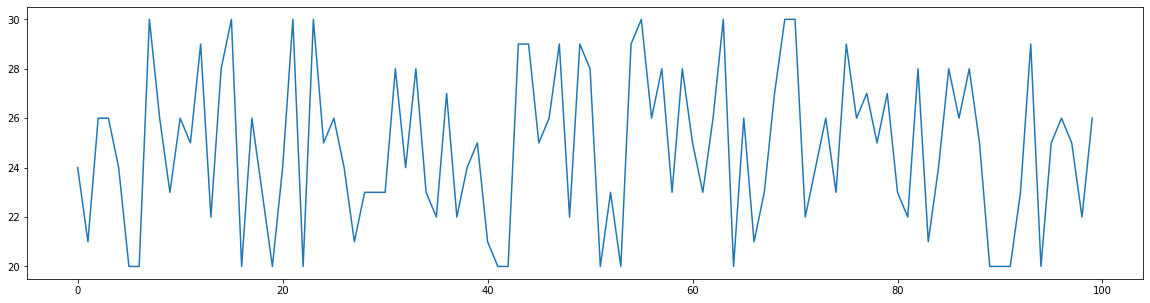

In [8]:
# Plot the first 100 values for the 'time-taken' column
plt.figure(figsize=(20,5))
plt.plot(data['time-taken'][:100])
plt.show()

In [9]:
data['cs-method'].value_counts()

GET     67386
POST     3324
Name: cs-method, dtype: int64

**I started my investigation** by retrieving a summary of the HTTP methods avaialable in the logs, this allowed me to determine the sort of actions being performed, there are two methods in use
- POST: This implies that data is being submitted to the web server
- GET: This implies that information is being requested from the web server

In [18]:
data['s-port'].value_counts()

443    70710
Name: s-port, dtype: int64

Retrieval of a summary on the ports in the log to determine if any request was transmitted via HTTP, the presence of only port "443" indicates that all queries were sent using the secure protocol, HTTPS.

In [62]:
data['sc-status'].value_counts()

200    59292
404     5901
301     4647
401      870
Name: sc-status, dtype: int64

To determine the presence of strange response codes or multiple unauthorised attempts, a summary of the HTTP status codes existing in the log is queried.

In [2]:
data['c-ip'].value_counts().head(n=10)

149.5.250.189     287
192.151.139.83    215
195.12.35.175     201
185.227.52.167    148
193.201.92.65     144
57.246.139.228    141
83.146.21.50      140
146.70.35.29      140
185.144.222.67    135
80.75.221.83      131
Name: c-ip, dtype: int64

The top 10 IP addresses are listed in order of the number of times they appear in the log, which indicates how many times they've made a request to the web server. This is to see whether any of the IP addresses are sending an unusually large number of requests.

In [4]:
group_method_st= pd.crosstab(data['cs-method'],data['sc-status'])
print(group_method_st)

sc-status    200   301  401   404
cs-method                        
GET        58975  2510    0  5901
POST         317  2137  870     0


Checking HTTP methods against status codes. It demonstrates that there are some 401 post requests.

In [14]:
table_grouping_method= pd.crosstab(data['c-ip'],data['cs-method'])
sorted_grouping_method=table_grouping_method.sort_values(by='POST', ascending=False).head(n=10)
print(sorted_grouping_method)

cs-method       GET  POST
c-ip                     
149.5.250.189    66   221
192.151.139.83   65   150
195.12.35.175    71   130
83.146.21.50    131     9
194.63.118.55    75     9
192.189.41.151  117     9
88.214.51.233   113     8
178.21.35.137    98     8
212.90.113.10   103     8
192.77.138.137  119     8


An attempt to idenitfy the likely source client ip addresses that are sending the unauthorized post requests. 
<br>
The IP addresses below have the highest counts of POST requests
1. 149.5.250.189    221
2. 192.151.139.83   150
3. 195.12.35.175    130

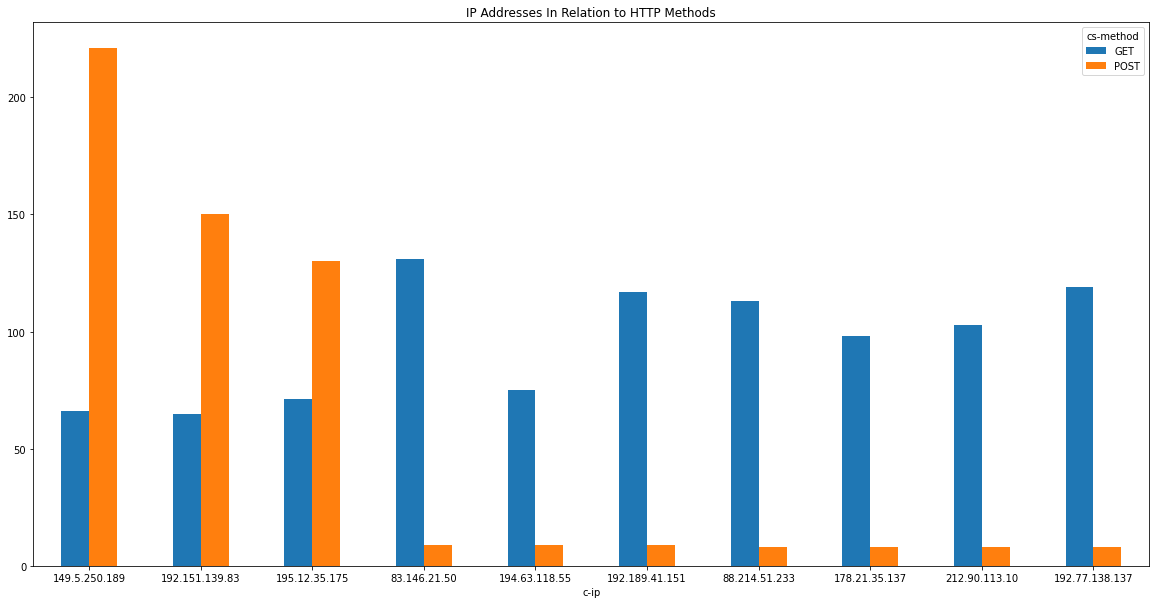

In [18]:
sorted_grouping_method.plot(kind='bar', rot=0, title="IP Addresses In Relation to HTTP Methods", figsize=(20,10)).grid(False)
plt.show()

This bar chart shows a visualization of the top ten client ip addresses in terms of POST requests

In [87]:
analysis_frame_group=data.groupby(['c-ip', 'sc-status']).size()

count_status=analysis_frame_group.to_frame(name="counts").reset_index()

count_401_sorted = (count_status[(count_401['sc-status']==401)]).sort_values(by='counts', ascending = False).head(n=10)
print(count_401_sorted)

                c-ip  sc-status  counts
275    149.5.250.189        401     214
1090  192.151.139.83        401     143
1492   195.12.35.175        401     123
1451   194.63.118.55        401       6
1110  192.189.41.151        401       5
2841    83.146.21.50        401       5
558    178.21.35.137        401       5
2978    89.197.59.19        401       5
2943    87.238.78.13        401       4
1019  188.119.155.16        401       4


# 401
This summary shows that the IP addresses below have the highest number of unauthorized attempt status code (401), however that is not enough to draw any conclusion as the attempts can be valid attempts over a long a period of time
<br>

1. 149.5.250.189         214
2. 192.151.139.83        143
3. 195.12.35.175         123

In [85]:
pd.set_option('display.max_rows', None)
time_frame_group=data.groupby(['date','time','c-ip', 'sc-status']).size()

count_time_frame=time_frame_group.to_frame(name="counts").reset_index()

sip1=(count_time_frame['sc-status']==401)&(count_time_frame['c-ip']=='149.5.250.189')

print(count_time_frame[sip1])

             date      time           c-ip  sc-status  counts
23934  2022-01-22  12:15:19  149.5.250.189        401       1
23935  2022-01-22  12:15:22  149.5.250.189        401       1
23936  2022-01-22  12:15:24  149.5.250.189        401       1
23937  2022-01-22  12:15:27  149.5.250.189        401       1
23938  2022-01-22  12:15:30  149.5.250.189        401       1
23939  2022-01-22  12:15:33  149.5.250.189        401       1
23940  2022-01-22  12:15:35  149.5.250.189        401       1
23941  2022-01-22  12:15:37  149.5.250.189        401       1
23942  2022-01-22  12:15:39  149.5.250.189        401       1
23943  2022-01-22  12:15:40  149.5.250.189        401       1
23946  2022-01-22  12:15:43  149.5.250.189        401       1
23947  2022-01-22  12:15:44  149.5.250.189        401       1
23948  2022-01-22  12:15:46  149.5.250.189        401       1
23949  2022-01-22  12:15:47  149.5.250.189        401       1
23950  2022-01-22  12:15:49  149.5.250.189        401       1
23951  2

This summary shows a rundown of the unauthorized attempts from the ip adress **149.5.250.189** in relation to the time that the attempts were made. <br>
The attempts were made on the same day with an average of 1-2 seconds time difference between each attempts 

In [3]:
pd.set_option('display.max_rows', None)
time_frame_group=data.groupby(['date','time','c-ip', 'sc-status']).size()

count_time_frame=time_frame_group.to_frame(name="counts").reset_index()

sip2=(count_time_frame['sc-status']==401)&(count_time_frame['c-ip']=='192.151.139.83')

print(count_time_frame[sip2])

            date      time            c-ip  sc-status  counts
1219  2022-01-01  21:27:24  192.151.139.83        401       1
1220  2022-01-01  21:27:25  192.151.139.83        401       1
1223  2022-01-01  21:27:27  192.151.139.83        401       1
1224  2022-01-01  21:27:29  192.151.139.83        401       1
1225  2022-01-01  21:27:31  192.151.139.83        401       1
1226  2022-01-01  21:27:32  192.151.139.83        401       1
1227  2022-01-01  21:27:34  192.151.139.83        401       1
1230  2022-01-01  21:27:36  192.151.139.83        401       1
1231  2022-01-01  21:27:38  192.151.139.83        401       1
1234  2022-01-01  21:27:41  192.151.139.83        401       1
1235  2022-01-01  21:27:44  192.151.139.83        401       1
1236  2022-01-01  21:27:45  192.151.139.83        401       1
1237  2022-01-01  21:27:48  192.151.139.83        401       1
1238  2022-01-01  21:27:50  192.151.139.83        401       1
1239  2022-01-01  21:27:53  192.151.139.83        401       1
1240  20

This summary shows a rundown of the unauthorized attempts from the ip adress **192.151.139.83** in relation to the time that the attempts were made. <br>
The attempts were made on the same day with an average of 1-2 seconds time difference between each attempts 

In [94]:
pd.set_option('display.max_rows', None)
time_frame_group=data.groupby(['date','time','c-ip', 'sc-status']).size()

count_time_frame=time_frame_group.to_frame(name="counts").reset_index()

sip3=(count_time_frame['sc-status']==401)&(count_time_frame['c-ip']=='195.12.35.175')

print(count_time_frame[sip3])

             date      time           c-ip  sc-status  counts
26389  2022-01-24  09:57:05  195.12.35.175        401       1
26390  2022-01-24  09:57:06  195.12.35.175        401       1
26391  2022-01-24  09:57:07  195.12.35.175        401       1
26392  2022-01-24  09:57:08  195.12.35.175        401       1
26393  2022-01-24  09:57:09  195.12.35.175        401       1
26394  2022-01-24  09:57:10  195.12.35.175        401       1
26395  2022-01-24  09:57:13  195.12.35.175        401       1
26396  2022-01-24  09:57:15  195.12.35.175        401       1
26399  2022-01-24  09:57:17  195.12.35.175        401       1
26400  2022-01-24  09:57:18  195.12.35.175        401       1
26401  2022-01-24  09:57:19  195.12.35.175        401       1
26402  2022-01-24  09:57:20  195.12.35.175        401       1
26403  2022-01-24  09:57:23  195.12.35.175        401       1
26404  2022-01-24  09:57:26  195.12.35.175        401       1
26405  2022-01-24  09:57:29  195.12.35.175        401       1
26406  2

This summary shows a rundown of the unauthorized attempts from the ip adress **195.12.35.175** in relation to the time that the attempts were made. <br>
The attempts were made on the same day with an average of 1-2 seconds time difference between each attempts 

In [7]:
method_frame_group=data.groupby(['c-ip', 'sc-status','cs-method','cs-uri-stem']).size()
count_method=method_frame_group.to_frame(name="counts").reset_index()

count_301=(count_method['sc-status']==301)&(count_method['c-ip']=='149.5.250.189')
print(count_method[count_301] ,"\n")



count_301=(count_method['sc-status']==301)&(count_method['c-ip']=='192.151.139.83')
print(count_method[count_301] ,"\n")


count_301=(count_method['sc-status']==301)&(count_method['c-ip']=='195.12.35.175')
print(count_method[count_301] ,"\n")

               c-ip  sc-status cs-method  cs-uri-stem  counts
3251  149.5.250.189        301       GET   index.aspx       1
3252  149.5.250.189        301       GET  logout.aspx       1
3253  149.5.250.189        301      POST   login.aspx       1 

                 c-ip  sc-status cs-method  cs-uri-stem  counts
11977  192.151.139.83        301       GET   index.aspx       1
11978  192.151.139.83        301       GET  logout.aspx       1
11979  192.151.139.83        301      POST   login.aspx       1 

                c-ip  sc-status cs-method  cs-uri-stem  counts
16446  195.12.35.175        301       GET   index.aspx       1
16447  195.12.35.175        301       GET  logout.aspx       1
16448  195.12.35.175        301      POST   login.aspx       1 



# 301
The summary above is to check if there were any successful login from the suspected IP addresses, it shows that each of the IP addresses had at least one successful login with the POST method, as a redirection (301) to the index and logout page are present

In [14]:
useragent_frame_group=data.groupby(['c-ip','cs(User-Agent)']).size()
count_uagent=useragent_frame_group.to_frame(name="counts").reset_index()
count_uagent_f=(count_uagent['c-ip']=='149.5.250.189')
print(count_uagent[count_uagent_f],"\n")

useragent_frame_group=data.groupby(['c-ip','cs(User-Agent)']).size()
count_uagent=useragent_frame_group.to_frame(name="counts").reset_index()
count_uagent_f=(count_uagent['c-ip']=='192.151.139.83')
print(count_uagent[count_uagent_f],"\n")


useragent_frame_group=data.groupby(['c-ip','cs(User-Agent)']).size()
count_uagent=useragent_frame_group.to_frame(name="counts").reset_index()
count_uagent_f=(count_uagent['c-ip']=='195.12.35.175')
print(count_uagent[count_uagent_f],"\n")



             c-ip                                     cs(User-Agent)  counts
88  149.5.250.189  Mozilla/5.0+(iPhone;+CPU+iPhone+OS+9_0+like+Ma...     287 

               c-ip                                     cs(User-Agent)  counts
340  192.151.139.83  Mozilla/5.0+(iPhone;+CPU+iPhone+OS+9_0+like+Ma...     215 

              c-ip                                     cs(User-Agent)  counts
468  195.12.35.175  Mozilla/5.0+(iPhone;+CPU+iPhone+OS+9_0+like+Ma...     201 



The above summary indicates that similar device type and browser were used to make the attempts, it might imply that the attempts were made by the same person or group of people. <br> This however could be fake data intentionally sent by the attacker.

# My Conclusion

After investigation of the system logs, the following IP addresses appear to be malicious:
1. 149.5.250.189        
2. 192.151.139.83        
3. 195.12.35.175 

The activity in the logs shows a bruteforce attack as there are multiple unuathorized attempts [401](#401)and at least one successful login [301](#301).

Something else to note is that the attempts were made on different days
<br>
Further investigation below can be carried out to further drill down on the attack
1. Is the traffic coming from a recognised host username to determine is user's login credentials has been compromised.
2. Are the requests coming from a recognised device to dtermine if a user's device has been compromised

# References

pandas.DataFrame.groupby Available from: __[Pandas Documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html)__ [Accessed 01 March 2022]